In [11]:
import pandas as pd
from scipy.stats import spearmanr

# Load your dataset
# Step 1: Take user input for the Excel file path
file_path = r'C:\Users\prakr\Downloads\MannWhitneyUTest.xlsx'

# Step 2: Load the data
try:
    df = pd.read_excel(file_path)
    print("\nData loaded successfully!\n")
except Exception as e:
    print(f"Error loading file: {e}")
    exit()
    
# Step 1: Select only the rating columns
rating_columns = ['Consistency', 'Usability', 'Further Action', 'Errors', 'User Control']

# Subset dataframe
ratings_df = df[rating_columns]

# Step 2: Create empty correlation and p-value matrices
corr_matrix = pd.DataFrame(index=rating_columns, columns=rating_columns)
pval_matrix = pd.DataFrame(index=rating_columns, columns=rating_columns)

# Step 3: Fill matrices with Spearman correlations and p-values
for col1 in rating_columns:
    for col2 in rating_columns:
        corr, pval = spearmanr(ratings_df[col1], ratings_df[col2])
        corr_matrix.loc[col1, col2] = round(corr, 3)
        pval_matrix.loc[col1, col2] = round(pval, 4)

# Display correlation matrix
print("\n🔗 Spearman Correlation Matrix:")
print(corr_matrix)

print("\n📉 P-Value Matrix:")
print(pval_matrix)



Data loaded successfully!


🔗 Spearman Correlation Matrix:
               Consistency Usability Further Action Errors User Control
Consistency            1.0     0.038          0.535 -0.338        0.342
Usability            0.038       1.0          0.013 -0.033        0.028
Further Action       0.535     0.013            1.0 -0.338        0.336
Errors              -0.338    -0.033         -0.338    1.0       -0.621
User Control         0.342     0.028          0.336 -0.621          1.0

📉 P-Value Matrix:
               Consistency Usability Further Action Errors User Control
Consistency            0.0    0.3559            0.0    0.0          0.0
Usability           0.3559       0.0         0.7481  0.424       0.5016
Further Action         0.0    0.7481            0.0    0.0          0.0
Errors                 0.0     0.424            0.0    0.0          0.0
User Control           0.0    0.5016            0.0    0.0          0.0


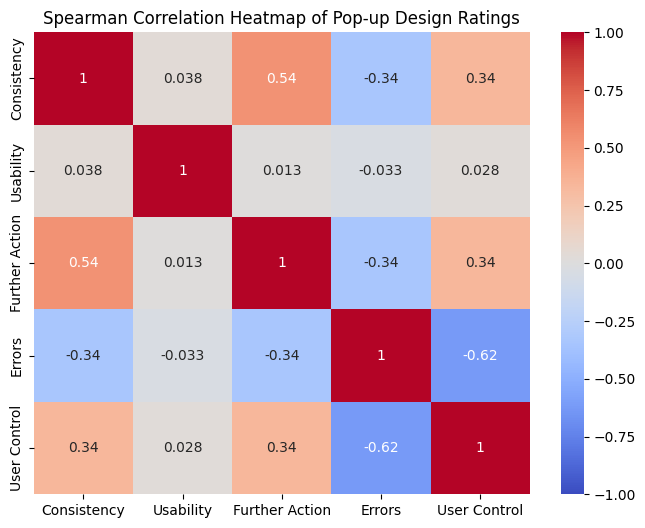

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to float for heatmap
corr_matrix = corr_matrix.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap of Pop-up Design Ratings')
plt.show()
